In [1]:
import networkx as nx
import pandas as pd

# Definitions


In [2]:
definitions = pd.read_json('../../definitions.json', typ='split')
using_nodes = ["Gene","Compound","Disease"]

#metanodes -"Gene","Compound","Disease"
for node in using_nodes:
    print(f'{node} : {definitions["metanodes"].get(node)}')

Gene : Protein-coding human genes. From Entrez Gene.
Compound : Approved small molecule compounds with documented chemical structures. From DrugBank.
Disease : Complex diseases, selected to be distinct and specific enough to be clinically relevant yet general enough to be well annotated. From Disease Ontology.


In [3]:
not_using_nodes = [node for node in definitions["metanodes"].keys() if node not in using_nodes]

In [4]:
using_edges = []

for edge in definitions["metaedges"].keys():
    e = edge.split('–')
    if (e[0] not in not_using_nodes) and (e[-1] not in not_using_nodes):
        using_edges.append(edge.replace('–',' - '))
        print(f'{edge} : {definitions["metaedges"].get(edge)}','\n')

Compound–binds–Gene : The Compound physically binds to the Gene's protein product according to BindingDB, DrugBank, or DrugCentral 

Compound–downregulates–Gene : The Gene is under-expressed in samples exposed to the Compound according to a consensus signature from LINCS L1000 

Compound–palliates–Disease : The Compound is a symptomatic indication for the Disease (i.e. the Compound treats a significant symptom of the Disease) according to PharmacotherapyDB 

Compound–resembles–Compound : The Compounds are chemical similar to each other: Their extended connectivity fingerprints have a Dice coefficient ≥ 0.5. 

Compound–treats–Disease : The Compound is a disease-modifying indication for the Disease (i.e. the Compound therapeutically changes the underlying or downstream biology of the Disease) according to PharmacotherapyDB 

Compound–upregulates–Gene : The Gene is over-expressed in samples exposed to the Compound according to a consensus signature from LINCS L1000 

Disease–associates–Ge

# nodes


In [5]:
metanodes = pd.read_csv('../../metanodes.tsv', sep='\t')
metanodes.query('metanode in @using_nodes')

,metanode,abbreviation,metaedges,nodes,unconnected_nodes
3,Compound,C,8,1552,14
4,Disease,D,8,137,1
5,Gene,G,16,20945,1800


In [6]:
nodes = pd.read_csv('../../hetionet-v1.0-nodes.tsv', sep='\t')
cancer_nodes = nodes[(nodes['kind'] == 'Disease') & nodes['name'].str.contains('cancer')]
cancer_nodes = list(cancer_nodes['id'])

In [7]:
nodes.query('kind in @using_nodes', inplace=True)

# nodes['id'] = nodes['id'].str.split('::').str[-1]

In [8]:
nodes

#### id is the node identifier prepended with the node type plus :: as a separator. 
#### name is the node name. 
#### kind is the node type.

,id,name,kind
13174,Compound::DB00014,Goserelin,Compound
13175,Compound::DB00035,Desmopressin,Compound
13176,Compound::DB00050,Cetrorelix,Compound
13177,Compound::DB00091,Cyclosporine,Compound
13178,Compound::DB00093,Felypressin,Compound
...,...,...,...
35803,Gene::9991,PTBP3,Gene
35804,Gene::9992,KCNE2,Gene
35805,Gene::9993,DGCR2,Gene
35806,Gene::9994,CASP8AP2,Gene


# edges

In [9]:
metaedges = pd.read_csv('../../metaedges.tsv', sep='\t')
metaedges.query('metaedge in @using_edges | metaedge == "Gene > regulates > Gene"',inplace=True)
metaedges

,metaedge,abbreviation,edges,source_nodes,target_nodes,unbiased
3,Compound - binds - Gene,CbG,11571,1389,1689,0
5,Compound - downregulates - Gene,CdG,21102,734,2880,21102
6,Compound - palliates - Disease,CpD,390,221,50,0
7,Compound - resembles - Compound,CrC,6486,1042,1054,6486
8,Compound - treats - Disease,CtD,755,387,77,0
9,Compound - upregulates - Gene,CuG,18756,703,3247,18756
10,Disease - associates - Gene,DaG,12623,134,5392,1284
11,Disease - downregulates - Gene,DdG,7623,44,5745,7623
14,Disease - resembles - Disease,DrD,543,112,106,0
15,Disease - upregulates - Gene,DuG,7731,44,5630,7731


In [10]:
edge_file = '../../edges.sif'
edges = pd.read_csv(edge_file, sep='\t',)

In [11]:
edges = pd.merge(metaedges[['metaedge','abbreviation']], edges, left_on='abbreviation', right_on='metaedge')
edges.drop('metaedge_y', axis=1, inplace=True)
edges

,metaedge_x,abbreviation,source,target
0,Compound - binds - Gene,CbG,Compound::DB00514,Gene::1136
1,Compound - binds - Gene,CbG,Compound::DB00686,Gene::2246
2,Compound - binds - Gene,CbG,Compound::DB00786,Gene::4317
3,Compound - binds - Gene,CbG,Compound::DB01209,Gene::4988
4,Compound - binds - Gene,CbG,Compound::DB01588,Gene::2560
...,...,...,...,...
562101,Gene > regulates > Gene,Gr>G,Gene::5184,Gene::8659
562102,Gene > regulates > Gene,Gr>G,Gene::22818,Gene::5613
562103,Gene > regulates > Gene,Gr>G,Gene::29888,Gene::5467
562104,Gene > regulates > Gene,Gr>G,Gene::5894,Gene::595


In [12]:
import pandas as pd

# 필터링 조건
condition = ((edges['source'].isin(cancer_nodes)) | (edges['target'].isin(cancer_nodes)))

# 조건에 맞는 행 선택
selected_edges = edges[condition]

# 결과 출력
selected_edges

,metaedge_x,abbreviation,source,target
32689,Compound - palliates - Disease,CpD,Compound::DB00741,Disease::DOID:263
32717,Compound - palliates - Disease,CpD,Compound::DB00443,Disease::DOID:1319
32722,Compound - palliates - Disease,CpD,Compound::DB00813,Disease::DOID:10283
32734,Compound - palliates - Disease,CpD,Compound::DB00673,Disease::DOID:219
32737,Compound - palliates - Disease,CpD,Compound::DB00443,Disease::DOID:1612
...,...,...,...,...
87556,Disease - upregulates - Gene,DuG,Disease::DOID:263,Gene::157
87567,Disease - upregulates - Gene,DuG,Disease::DOID:1793,Gene::1520
87574,Disease - upregulates - Gene,DuG,Disease::DOID:219,Gene::717
87576,Disease - upregulates - Gene,DuG,Disease::DOID:1324,Gene::60625


In [13]:
compound = list(set(selected_edges.loc[selected_edges['source'].str.contains('Compound'), 'source'].tolist() +
                      selected_edges.loc[selected_edges['target'].str.contains('Compound'), 'target'].tolist()))

disease = list(set(selected_edges.loc[selected_edges['source'].str.contains('Disease'), 'source'].tolist() +
                     selected_edges.loc[selected_edges['target'].str.contains('Disease'), 'target'].tolist()))

gene = list(set(selected_edges.loc[selected_edges['source'].str.contains('Gene'), 'source'].tolist() +
                  selected_edges.loc[selected_edges['target'].str.contains('Gene'), 'target'].tolist()))

# label

In [14]:
connected_compound_disease = selected_edges[(selected_edges['source'].str.contains('Compound')) & (selected_edges['target'].str.contains('Disease'))]

In [15]:
connected_compound_disease.drop(['metaedge_x', 'abbreviation'],axis=1, inplace=True)
connected_compound_disease = connected_compound_disease.assign(label = 1)

C:\Users\young\AppData\Local\Temp\ipykernel_13656\278530246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connected_compound_disease.drop(['metaedge_x', 'abbreviation'],axis=1, inplace=True)


In [16]:
connected_compound_disease_list = list(zip(connected_compound_disease['source'],connected_compound_disease['target']))

# 그래프 생성

In [17]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(compound,group='compound', weight=2)
G.add_nodes_from(gene,group='gene', weight=1)
G.add_nodes_from(disease,group='disease', weight=2)

In [18]:
# 엣지 추가 및 가중치 부여
for _, edge in selected_edges.iterrows():
    source = edge['source']
    target = edge['target']
    weight = 2 if G.nodes[source]['group'] == 'compound' and G.nodes[target]['group'] == 'disease' else 1
    G.add_edge(source, target, weight=weight)

In [19]:
print(G['Disease::DOID:1612']['Gene::1894'])

{'weight': 1}


In [20]:
print(G['Compound::DB00443']['Disease::DOID:1612'])

{'weight': 2}


# Node2Vec

In [21]:
from node2vec import Node2Vec

# Node2Vec 모델 생성 및 학습
node2vec = Node2Vec(G, dimensions=30, walk_length=30, num_walks=200, workers=4, p=2.0, q=0.5)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/4883 [00:00<?, ?it/s]

In [22]:
# 노드 임베딩 확인
embedding = model.wv[compound[0]]
print(f'Embedding for Node:, {compound[0]}, \n {embedding}')

Embedding for Node:, Compound::DB00361, 
 [ 0.6125722   0.22930686 -0.18371962 -0.20176305  0.5099951  -0.26662916
  0.13620166 -0.02282675 -0.3186554   0.26035315  0.08740851  0.17812112
  0.0383952   0.26966882 -0.38725954 -0.14621405 -0.25683358  0.15728457
  0.2618387   0.14236705  0.45874694  0.3365907  -0.5332693   0.19072777
 -0.07150028  0.02554516 -0.22732973 -0.12291616  0.05416191  0.11762757]


In [23]:
embedding = model.wv[disease[0]]
print(f'Embedding for Node:, {disease[0]}, \n {embedding}')

Embedding for Node:, Disease::DOID:10763, 
 [ 0.8054713  -0.36560965  0.33648324 -0.7766002  -0.09257153  0.7886297
 -0.28613365 -0.45867148 -0.5574316   0.25753453 -0.04204815  0.4191156
 -0.02646895 -0.01680054 -0.16162987  0.9876188   0.0980572  -0.15084109
 -0.31228954  0.27784756  0.39167723  0.67226666  0.26141635  0.15188244
 -0.6001563   0.17770508 -0.22615327 -0.69726986  0.14285089 -0.6436128 ]


# 데이터

In [24]:
#cartesian product
df1 = pd.DataFrame({'source':compound})
df2 = pd.DataFrame({'target':disease})

compound_disease = pd.merge(df1.assign(key=1),df2.assign(key=1), on='key').drop('key', axis=1)

#label
compound_disease = pd.merge(compound_disease, connected_compound_disease, how='outer')
compound_disease = compound_disease.fillna(0)
compound_disease

,source,target,label
0,Compound::DB00361,Disease::DOID:10763,0.0
1,Compound::DB00361,Disease::DOID:1964,0.0
2,Compound::DB00361,Disease::DOID:12306,0.0
3,Compound::DB00361,Disease::DOID:585,0.0
4,Compound::DB00361,Disease::DOID:11054,0.0
...,...,...,...
9115,Compound::DB00291,Disease::DOID:1192,0.0
9116,Compound::DB00291,Disease::DOID:5612,0.0
9117,Compound::DB00291,Disease::DOID:4362,0.0
9118,Compound::DB00291,Disease::DOID:11819,0.0


In [25]:
compound_disease_label = []
for com in compound:
    for dis in disease:
        val = []
        val.append(com)
        val.append(dis)
        tup = (com,dis)
        if tup in connected_compound_disease_list:
            val.append(1)
        else:
            val.append(0)
        compound_disease_label.append(val)

In [26]:
import numpy as np

input = []
for data in compound_disease_label:
    input.append(np.vstack([model.wv[data[0]], model.wv[data[1]]]).reshape(60,))


# Classification

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(input, compound_disease['label'], test_size=0.3, random_state=0, stratify=compound_disease['label'])

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=0)

lr.fit(X_train,y_train)	

LogisticRegression(class_weight='balanced', random_state=0)

In [29]:
print(lr.coef_ ,'\n' ,lr.intercept_)

[[-1.74374886  1.05958278  0.93662931  0.36152172 -0.14452104  1.88742714
   1.25349976  1.27147728 -0.08101195 -0.07687921 -0.27493856 -3.08865752
  -1.74025556  0.15043663  1.76104729 -0.34114188  2.31570145  0.62030439
   0.37869963 -2.80445658  1.45019158 -0.44070666 -0.4843619  -0.35732427
  -0.11924184  1.48636702  0.17469297 -0.65788869  0.04764343 -0.47447451
  -1.36909297 -1.0519636   0.75450818  3.55830522 -0.44259691 -1.89931073
  -4.16459712  0.86562625  3.98554967  1.2728828  -2.40658295  2.79053189
   4.32841099  3.29097103 -2.33660921  1.45097223 -2.01863117 -0.19748977
   1.9432787   2.1647093  -1.82358707 -2.06713882  0.49412757 -5.22835305
  -1.45465589  0.10076782  2.35900428  3.94576995  0.89680574  1.66993967]] 
 [6.3968076]


In [30]:
lr.score(X_test,y_test)
															    

0.8888888888888888

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 테스트 세트에 대한 예측
y_pred = lr.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8888888888888888
Precision: 0.22279792746113988
Recall: 0.9555555555555556
F1 Score: 0.36134453781512604
Confusion Matrix:
[[2346  300]
 [   4   86]]


In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# XGBoost 모델 생성 및 학습
xg1 = xgb.XGBClassifier(random_state=0)
xg1.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = xg1.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.985014619883041
Precision: 0.9454545454545454
Recall: 0.5777777777777777
F1 Score: 0.7172413793103448
Confusion Matrix:
[[2643    3]
 [  38   52]]


In [33]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# 언더샘플링 적용
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# XGBoost 모델 생성 및 학습
xg2 = xgb.XGBClassifier(random_state=0)
xg2.fit(X_resampled, y_resampled)

# 테스트 세트에 대한 예측
y_pred = xg2.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8680555555555556
Precision: 0.19550561797752808
Recall: 0.9666666666666667
F1 Score: 0.32523364485981304
Confusion Matrix:
[[2288  358]
 [   3   87]]


In [34]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(input, compound_disease['label'], test_size=0.3, random_state=0, stratify=compound_disease['label'])

# 오버샘플링 적용
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# XGBoost 모델 생성 및 학습
xg3 = xgb.XGBClassifier(random_state=0)
xg3.fit(X_resampled, y_resampled)

# 테스트 세트에 대한 예측
y_pred = xg3.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9857456140350878
Precision: 0.8227848101265823
Recall: 0.7222222222222222
F1 Score: 0.7692307692307693
Confusion Matrix:
[[2632   14]
 [  25   65]]


# Evaluation

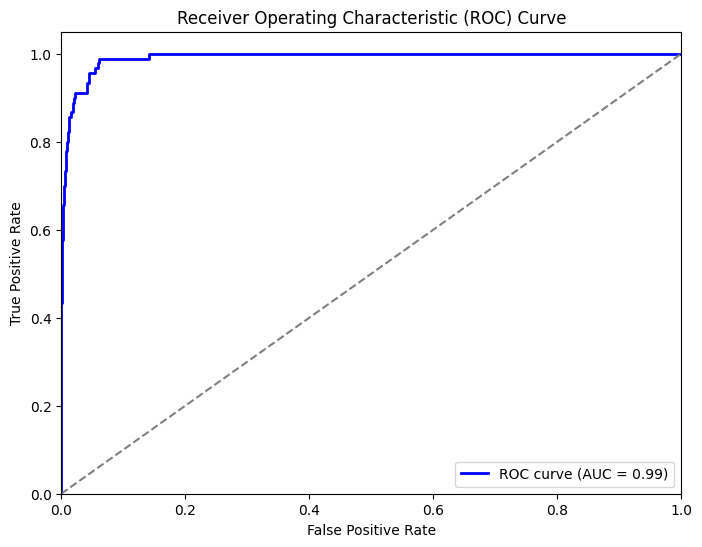

In [35]:
import sklearn.metrics as sm
import matplotlib.pyplot as plt

y_probs = xg3.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = sm.roc_curve(y_test, y_probs)

# AUC (Area Under the ROC Curve) 계산
auc = sm.roc_auc_score(y_test, y_probs)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()